In [4]:
import numpy as np
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as PLT
import seaborn as SB
import random as RANDOM

# <font color="orange">Continuous Distributions</font>
  * normal
  * uniform
  * exponential

<AxesSubplot:>

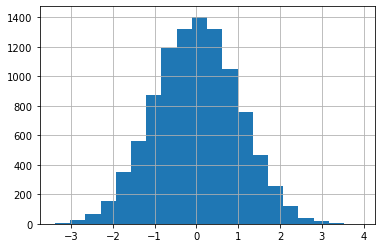

In [5]:
DT_norm = stats.norm.rvs(size=10000, loc=0, scale=1)
pd.Series(DT_norm).hist(bins=20)

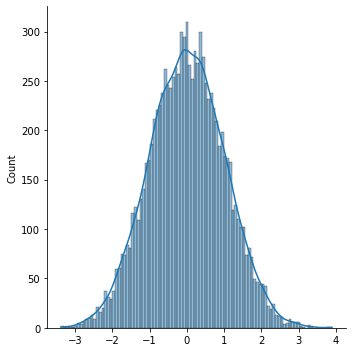

In [6]:
SB.displot(DT_norm, bins=100, kde=True)

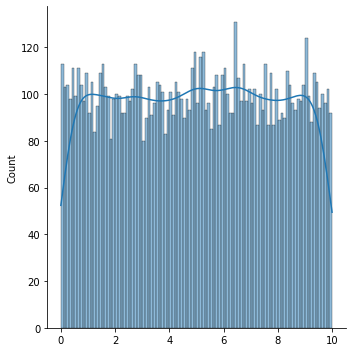

In [7]:
DT_uniform = stats.uniform.rvs(size=10000, loc=0, scale=10)
SB.displot(DT_uniform, kde=True, bins=100)

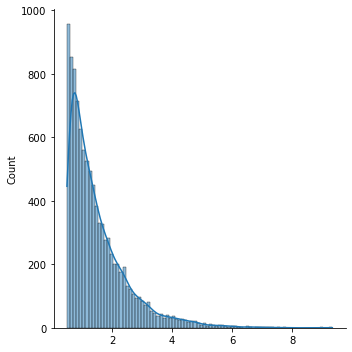

In [8]:
DT_exponential = stats.expon.rvs(1/2,size=10000) # mean call time 2 mintue
SB.displot(DT_exponential, kde=True)

# <font color="orange">Discrete Distributions</font>
  * bernoli
  * binomial
  * multinomial
  * poisson

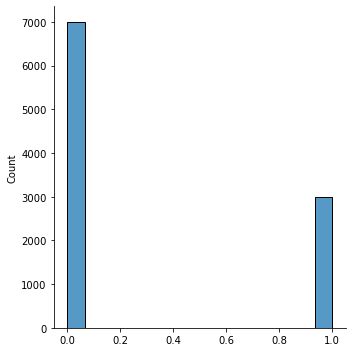

In [9]:
DT_bernoli = stats.bernoulli.rvs(size=10000, p=.3)
SB.displot(DT_bernoli)

array([28, 33, 32, ..., 36, 32, 27])

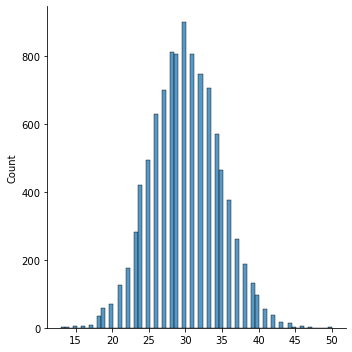

In [10]:
DT_binomial = stats.binom.rvs(size=10000, p=.3, n=100)
SB.displot(DT_binomial)
DT_binomial

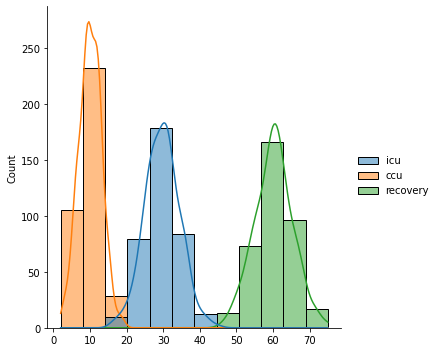

In [11]:
icu = 0.3
ccu = 0.1
recovery = 0.6
DT_multinomial = stats.multinomial.rvs(100, [icu,ccu,recovery], size=365)
DT_multinomial = pd.DataFrame(DT_multinomial, columns=['icu','ccu','recovery'])

SB.displot(DT_multinomial, kde=True)

[ 6 10  8  6 11  5 12  9 10 12  5  3  4  8  6 10  3 11  2  3  7  4  7  6
 11 10 12 12  5  3  6  7  6  7  3 14  7  6  7  8  5  8  6  9  9  9 10  9
  3  6  7  9  4 14  8  9  6  6 11  3  8 10  9  7  3 13  1 12 10  4  8 11
  6  8  8 13 10  5  7  9  7  5  9  8 10  6  6  6  8  1  7  9  5 10  6  4
  5  4  7  7  5  3  5  4  5  7  7  3  8  7  4  7  7  5 10  4  6  8  5  7
  7  8 10 12 11  3  4  9  8  9  6  9  8  6  2  6 10  8  5  8  2  7  4  9
  5  6  6  5 10  9  6 10 11  4  6  6  5  8 10  6 12  2  6  8  4  6  8  4
  5 10  5  8  6  7  8 10  7  5  9  7 10  9  5  8 11  4 11 10  9  6 11  8
  6  6  8  8  4  5  8 13  7  3  6 12  3  8  6  8  6  9  6 11  9  9  8  6
  8  6  8  5  6 10  9 14  6  6 10  4  7  5  9  8 10  7  4  7 12  9  6  9
  4 10  4  8  2 10 14  9  4  8 11  7  7  5  8 11  5  9 11 13  4  8 14  3
  2  8  8  6  5  3  5  7  6  3  8  8 12  4 10  6 12  6  9  7 10  3 12  3
  4  3  5  7  8  5  9  7  8  8  4  8  5 10 13  5  5  6  7  6  1  4  7  9
  6  4 10  7 10 11  4  9 12  7  8  5  7  8  5  9  7

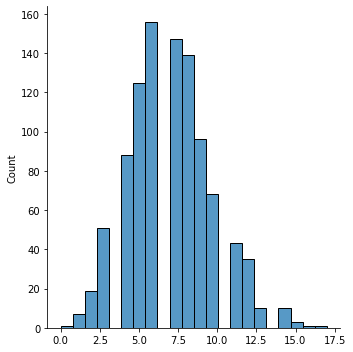

In [12]:
DT_poisson = stats.poisson.rvs(mu=7, size=1000)
print(DT_poisson)

SB.displot(DT_poisson)

# <font color="orange">PDF(Continuous) - PMF(discrete) - CDF</font>

In [13]:
DT_binomial = stats.binom(5000,.2)
TAKHT = 400
pmfsum = 0
# for i in range(1000, 5000):
#     pmfsum+= DT_binomial.pmf(i)
# print(pmfsum)
DT_binomial.cdf(5000) - DT_binomial.cdf(1000) 

0.49153823516345097

In [14]:
DT_poisson = stats.poisson(160) #160 moshtari dar rooz
1 - DT_poisson.cdf(150) # ehtemal 200 moshtari be bala da rooz

0.7719677058307436

# <font color="orange">Comparison Distributions</font>
 * Kullback Divergence (KL)
 * Jenson Shanon(JS)
 * Kolmogorov Smirnov (KS)
 

In [15]:
def KL_divergence(p,q):
    return np.sum(
        np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )
    )

0.017495674168934057

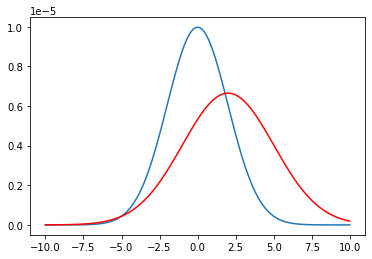

In [16]:
DT_X = np.arange(-10,10,0.001)
p = stats.norm.pdf(DT_X,0,2) / len(DT_X)
q = stats.norm.pdf(DT_X,2,3)/ len(DT_X)

PLT.plot(DT_X,p)
PLT.plot(DT_X,q, c='red')
KL_divergence(p,q)

### <font color="Brown">Kullback Divergence (KL)</font>

In [17]:
WH = pd.read_csv('../datasets/weight-height.csv')
WH.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,   2.,   3.,   1.,
          5.,   5.,   4.,   6.,   5.,   8.,   9.,   9.,  12.,  14.,   9.,
         16.,  16.,  19.,  29.,  34.,  27.,  20.,  37.,  47.,  56.,  60.,
         63.,  59.,  70.,  77.,  78.,  88.,  89.,  96., 101., 125., 131.,
        127., 129., 148., 148., 150., 135., 122., 168., 145., 139., 151.,
        134., 124., 112., 144.,  93., 133., 109.,  98., 115., 113., 103.,
         83.,  79.,  62.,  61.,  46.,  50.,  40.,  43.,  42.,  34.,  28.,
         30.,  16.,  20.,  13.,  11.,   8.,  11.,   5.,   8.,   4.,   7.,
          8.,   4.,   3.,   1.,   3.,   0.,   0.,   1.,   0.,   2.,   1.,
          1.]),
 array([58.40690493, 58.61282331, 58.81874168, 59.02466005, 59.23057843,
        59.4364968 , 59.64241518, 59.84833355, 60.05425192, 60.2601703 ,
        60.46608867, 60.67200705, 60.87792542, 61.0838438 , 61.28976217,
        61.49568054, 61.70159892, 61.90751729, 62.11343567, 62.31935404,
        62.52527241, 62.73

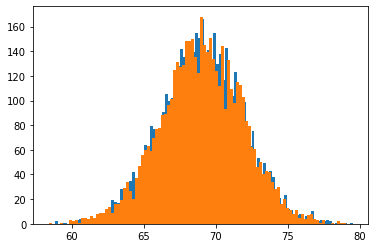

In [18]:
MH = WH[WH['Gender']=='Male']['Height']
FMH = WH[WH['Gender']=='Female']['Height']

NMH = stats.norm.rvs(size=len(MH), loc=MH.mean(), scale=MH.std())
PLT.hist(NMH,bins=100)
PLT.hist(MH,bins=100)

In [19]:
MHcount, _ = np.histogram(MH,bins=100)
FMHcount, _ = np.histogram(FMH,bins=100)
NMHcount, _ = np.histogram(NMH,bins=100)
KL_divergence(MHcount/len(MH),NMHcount/len(MH))

/tmp/ipykernel_6305/2900689964.py:3: RuntimeWarning: divide by zero encountered in true_divide
  np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )
/tmp/ipykernel_6305/2900689964.py:3: RuntimeWarning: invalid value encountered in true_divide
  np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )
/tmp/ipykernel_6305/2900689964.py:3: RuntimeWarning: divide by zero encountered in log
  np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )
/tmp/ipykernel_6305/2900689964.py:3: RuntimeWarning: invalid value encountered in multiply
  np.where(np.logical_and(p!=0,q!=0), p* np.log(p/q), 0 )


0.03685823466453179

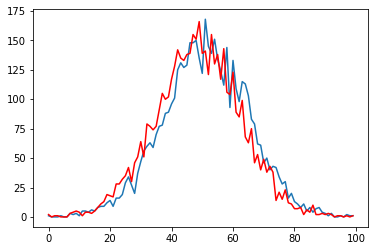

In [20]:
PLT.plot(MHcount)
PLT.plot(NMHcount,c='red')

### <font color="Brown">Jenson Shanon(JS): 0~ JS ~1 sensitive to bins</font>

In [21]:
def Jenson_shanon(p,q):
    p = p / np.linalg.norm(p, ord=1)
    q = q / np.linalg.norm(q, ord=1)
    m = .5 * (p + q)
    return  .5 * ( stats.entropy(p,m) + stats.entropy(q,m) )

In [22]:
Jenson_shanon(MHcount,NMHcount) # MH is a normal distribution

0.008968201840300836

In [23]:
WINSPEED = pd.read_csv('../datasets/wind_speed_laurel_nebraska.csv')
WINSPEED.head()

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5


In [24]:
NWINSPEED_AVG = stats.norm.rvs(size=len(WINSPEED['10 Min Sampled Avg']), loc=WINSPEED['10 Min Sampled Avg'].mean(), scale=WINSPEED['10 Min Sampled Avg'].std() )
WINSPEED_AVG_count, _ = np.histogram(WINSPEED['10 Min Sampled Avg'], bins=100)
NWINSPEED_AVG_count, _ = np.histogram(NWINSPEED_AVG, bins=100)

In [25]:
Jenson_shanon(WINSPEED_AVG_count,NWINSPEED_AVG_count)

0.12931159714081708

(array([ 1.,  0.,  7.,  6.,  4.,  9.,  9., 20., 17., 23., 21., 25., 16.,
        18.,  9., 10., 13.,  7.,  3.,  3.]),
 array([ 3.51528637,  5.02707642,  6.53886647,  8.05065652,  9.56244657,
        11.07423662, 12.58602667, 14.09781672, 15.60960677, 17.12139682,
        18.63318687, 20.14497692, 21.65676697, 23.16855702, 24.68034707,
        26.19213712, 27.70392717, 29.21571722, 30.72750727, 32.23929732,
        33.75108737]),
 <BarContainer object of 20 artists>)

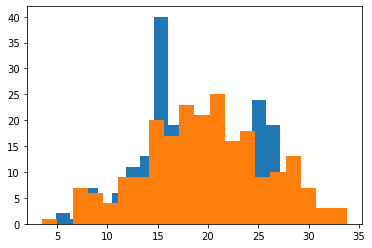

In [26]:
PLT.hist(WINSPEED['10 Min Sampled Avg'], bins=20)
PLT.hist(NWINSPEED_AVG, bins=20)

### <font color="Brown">Kolmogorov Smirnov (KS)</font>
 * H0 : two distribution is same
 * if p-value under 0.05 reject H0

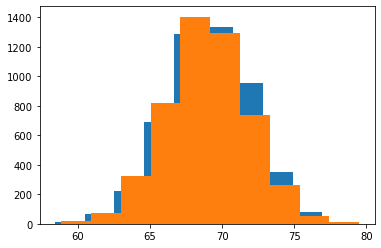

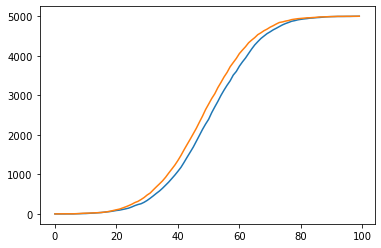

KstestResult(statistic=0.05, pvalue=0.9996892272702655)

In [27]:
PLT.hist(MH)
PLT.hist(NMH)
PLT.show()

PLT.plot(np.cumsum(MHcount))
PLT.plot(np.cumsum(NMHcount))
PLT.show()

stats.kstest(MHcount, NMHcount)

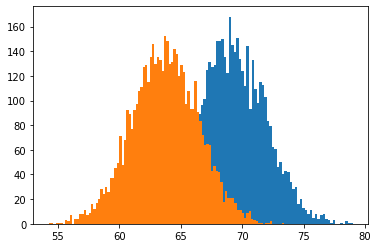

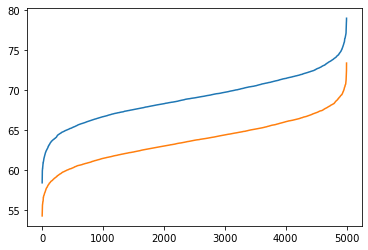

KstestResult(statistic=0.6664, pvalue=0.0)

In [28]:
PLT.hist(MH.sort_values().reset_index(drop=True),bins=100)
PLT.hist(FMH.sort_values().reset_index(drop=True),bins=100)
PLT.show()

PLT.plot(MH.sort_values().reset_index(drop=True))
PLT.plot(FMH.sort_values().reset_index(drop=True))
PLT.show()

stats.kstest(MH, FMH)

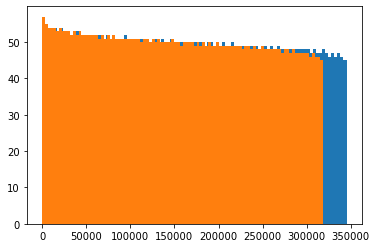

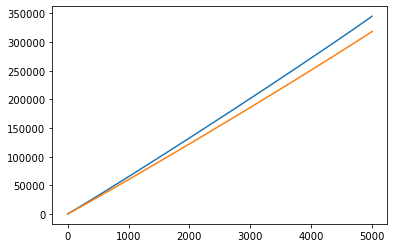

In [29]:
PLT.hist(np.cumsum(MH.sort_values().reset_index(drop=True)),bins=100)
PLT.hist(np.cumsum(FMH.sort_values().reset_index(drop=True)),bins=100)
PLT.show()

PLT.plot(np.cumsum(MH.sort_values().reset_index(drop=True)))
PLT.plot(np.cumsum(FMH.sort_values().reset_index(drop=True)))
PLT.show()

In [30]:
stats.kstest(np.cumsum(MHcount), np.cumsum(FMHcount), N=1000)

KstestResult(statistic=0.04, pvalue=0.999998821968263)

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   3.,   2.,   7.,   0.,
          4.,   4.,   8.,   8.,  11.,   7.,   9.,  16.,  12.,  17.,  20.,
         28.,  24.,  30.,  26.,  37.,  37.,  45.,  49.,  71.,  48.,  68.,
         92.,  89.,  77.,  92.,  97., 108., 111., 127., 129., 115., 135.,
        146., 130., 135., 133., 124., 152., 148., 130., 131., 142., 138.,
        120., 129., 123.,  97., 108.,  93.,  93., 116.,  91.,  83.,  72.,
         64.,  65.,  64.,  43.,  47.,  43.,  42.,  34.,  18.,  27.,  21.,
         21.,  21.,  17.,  11.,  11.,   9.,   5.,   9.,  10.,   4.,   3.,
          2.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([-9.44564028, -9.25437575, -9.06311123, -8.8718467 , -8.68058218,
        -8.48931765, -8.29805313, -8.1067886 , -7.91552408, -7.72425955,
        -7.53299502, -7.3417305 , -7.15046597, -6.95920145, -6.76793692,
        -6.5766724 , -6.38540787, -6.19414335, -6.00287882, -5.8116143 ,
        -5.62034977, -5.42

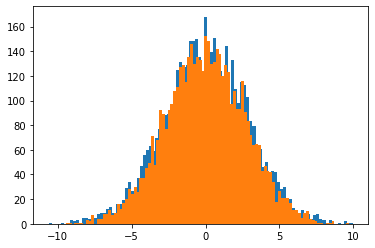

In [31]:
# zero center
PLT.hist(MH-MH.mean(),bins=100)
PLT.hist(FMH-FMH.mean(),bins=100)

In [32]:
stats.kstest(MH-MH.mean(), FMH-FMH.mean())

KstestResult(statistic=0.0194, pvalue=0.3035775745288207)

In [33]:
stats.kstest(MH-MH.mean(),'norm')

KstestResult(statistic=0.23808525858975527, pvalue=7.336270444149125e-250)

In [34]:
stats.kstest(MH,NMH)

KstestResult(statistic=0.0166, pvalue=0.49623226435327117)

# <font color="orange">AB Testing</font>

In [35]:
A = np.array([23,21,19,24,35,17,18,24,33,21,23,27])
B = np.array([31,28,19,24,32,27,16,41,23,32,29,33])

In [36]:
print(A.mean())
print(B.mean())
print(B.mean()-A.mean())

print(A.std())
print(B.std())

23.75
27.916666666666668
4.166666666666668
5.324863065531983
6.473771869800651


In [37]:
def suffle_experiment(A,B,N):
    ABAPEND = np.append(A,B)
    np.random.shuffle(ABAPEND)
    
    diff_mean = np.empty([N,1])
    for _ in range(N):
        EXLABEL = np.random.randint(0,2, len(ABAPEND))
        EXDATA = np.array([EXLABEL,ABAPEND]).T
        EXA = EXDATA[EXDATA[:,0]==0]
        EXB = EXDATA[EXDATA[:,0]==1]
        diff_mean[_] = EXB[:,1].mean() - EXA[:,1].mean()
    return diff_mean

In [38]:
RLDIFF = B.mean() - A.mean()
EXDIFF = suffle_experiment(A,B,1000)
len(EXDIFF[EXDIFF>=RLDIFF]) / len(EXDIFF)

0.051

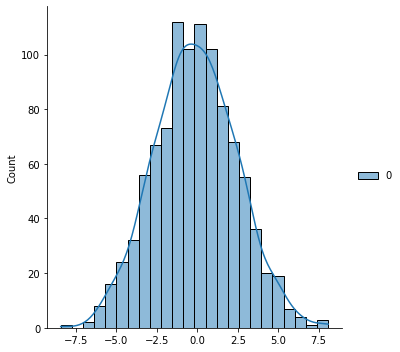

In [39]:
SB.displot(EXDIFF, kde=True)

### <font color="Brown">AB Test (sales real data): </font>

In [166]:
ABDATA = pd.read_csv('../datasets/ab_data.csv', usecols=['user_id','group','landing_page','converted','timestamp'])
display(ABDATA.head())

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [134]:
print(ABDATA.shape)
ABDATA.nunique()

(294478, 5)


user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [170]:
A_CONDITION = (ABDATA['group']=='control') & (ABDATA['landing_page']=='old_page') 
B_CONDITION = (ABDATA['group']=='treatment') & (ABDATA['landing_page']=='new_page')
# ABDATA = ABDATA[A_CONDITION | B_CONDITION]
ADATA = ABDATA[A_CONDITION]
BDATA = ABDATA[B_CONDITION]
ABDATA = ADATA.merge(BDATA, how='outer')

ABDATA.drop_duplicates('user_id',inplace=True)
# ABDATA[ABDATA['user_id'].duplicated()]
# ABDATA.drop(ABDATA[ABDATA['user_id'].duplicated()].index,inplace=True)

len(ABDATA)

290584

In [174]:
ABDATA['converted'].describe()[['count','mean']]

count    290584.000000
mean          0.119597
Name: converted, dtype: float64

In [127]:
ADATA['converted'].describe()[['count','mean']]

count    145274.000000
mean          0.120386
Name: converted, dtype: float64

In [128]:
BDATA['converted'].describe()[['count','mean']]

count    145311.000000
mean          0.118807
Name: converted, dtype: float64

In [172]:
ABDATA[~ABDATA['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
290579,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
290580,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
290581,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
290582,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [ ]:
# H0: m1 = m2
# H1: m2 > m1

In [222]:
ADATA_sample_converted = np.random.choice(
    [1,0], size=len(ADATA), p=[ABDATA['converted'].mean(),(1-ABDATA['converted'].mean())]
)

BDATA_sample_converted = np.random.choice(
    [1,0], size=len(BDATA), p=[ABDATA['converted'].mean(),(1-ABDATA['converted'].mean())]
)

print(ADATA_sample_converted.mean())
print(BDATA_sample_converted.mean())

0.12097828930159561
0.12009496937581722


In [266]:
ADATA_sample_converted = stats.binom.rvs(size=10000, p=ABDATA['converted'].mean(),n=len(ADATA))
(ADATA_sample_converted/len(ADATA)).mean()

0.11961597395266874

In [258]:
BDATA_sample_converted = stats.binom.rvs(size=10000, p=ABDATA['converted'].mean(),n=len(BDATA))
(BDATA_sample_converted/len(BDATA)).mean()

0.11960873167710413